In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr, spearmanr
from PIL import Image
import deeplake
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

C:\Users\PC\anaconda3\envs\kenza\lib\site-packages\deeplake\util\check_latest_version.py:33: UserWarning: A newer version of deeplake (3.9.9) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  f"A newer version of deeplake ({latest_version}) is available. It's recommended that you update to the latest version using `pip install -U deeplake`."


In [2]:
# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load text data
csv_dataset_path = "C:/Users/PC/Desktop/text.csv"  # Updated path to the uploaded dataset
emotion_df = pd.read_csv(csv_dataset_path)

In [4]:
emotion_df.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [5]:
emotion_df.info

<bound method DataFrame.info of         Unnamed: 0                                               text  label
0                0      i just feel really helpless and heavy hearted      4
1                1  ive enjoyed being able to slouch about relax a...      0
2                2  i gave up my internship with the dmrg and am f...      4
3                3                         i dont know i feel so lost      0
4                4  i am a kindergarten teacher and i am thoroughl...      4
...            ...                                                ...    ...
416804      416804  i feel like telling these horny devils to find...      2
416805      416805  i began to realize that when i was feeling agi...      3
416806      416806  i feel very curious be why previous early dawn...      5
416807      416807  i feel that becuase of the tyranical nature of...      3
416808      416808  i think that after i had spent some time inves...      5

[416809 rows x 3 columns]>

In [6]:
emotion_df.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [7]:
# Handling missing values and duplicates
emotion_df.drop_duplicates(inplace=True)
missing_values_summary = emotion_df.isna().sum()
print("\nMissing values summary:")
print(missing_values_summary)


Missing values summary:
Unnamed: 0    0
text          0
label         0
dtype: int64


In [8]:
# Preprocess text data
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Lowercase the text

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

emotion_df['preprocessed_text'] = emotion_df['text'].apply(preprocess_text)

In [9]:
# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
X_text = tfidf_vectorizer.fit_transform(emotion_df['preprocessed_text'])
y_text = emotion_df['label']

In [10]:
# Train-test split for text data
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

In [11]:
# Train a Logistic Regression model on text data
text_model = LogisticRegression(max_iter=1000)
text_model.fit(X_train_text, y_train_text)

LogisticRegression(max_iter=1000)

In [12]:
# Predict and evaluate on test data
y_text_pred = text_model.predict(X_test_text)
text_accuracy = accuracy_score(y_test_text, y_text_pred)
print(f'Text Model Accuracy: {text_accuracy}')

Text Model Accuracy: 0.8940404500851707


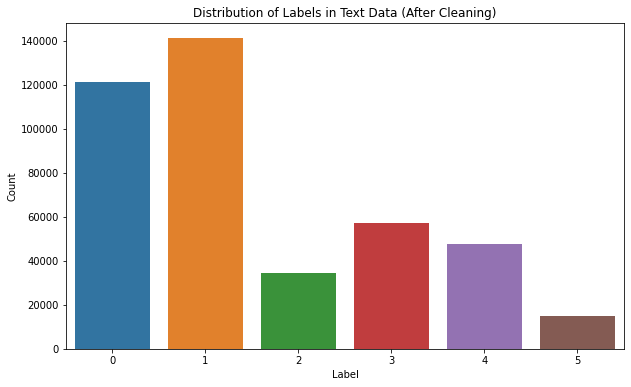

In [13]:
# Visualize the distribution of labels after cleaning
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=emotion_df)
plt.title('Distribution of Labels in Text Data (After Cleaning)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [14]:
# Load DeepLake image dataset
image_ds = deeplake.load('hub://activeloop/fer2013-train')

/

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train


\

hub://activeloop/fer2013-train loaded successfully.


In [15]:
image_ds.summary()

Dataset(path='hub://activeloop/fer2013-train', read_only=True, tensors=['images', 'labels'])

 tensor      htype          shape        dtype  compression
 -------    -------        -------      -------  ------- 
 images      image     (28709, 48, 48)   uint8    None   
 labels   class_label    (28709, 1)     uint32    None   


In [16]:
image_ds.info

{'classes': '0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral', 'source': 'https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/', 'title': 'Challenges in Representation Learning: Facial Expression Recognition Challenge'}

In [17]:
# Convert tensor objects to numpy arrays
images = np.array(image_ds['images'])
labels = np.array(image_ds['labels'])

In [18]:
# Check if images and labels are in the correct format
if isinstance(images, np.ndarray) and len(images) > 0:
    print("Type of image:", type(images[0]))
    print("Shape of image:", images[0].shape)
else:
    print("Error: Images are not in the expected format")

if isinstance(labels, np.ndarray) and len(labels) > 0:
    print("Type of label:", type(labels[0]))
    print("Shape of label:", labels[0].shape)
else:
    print("Error: Labels are not in the expected format")


Type of image: <class 'numpy.ndarray'>
Shape of image: (48, 48)
Type of label: <class 'numpy.ndarray'>
Shape of label: (1,)


In [19]:
# Debug: Print the first few images and labels
print("First few images:", images[:5])
print("First few labels:", labels[:5])

First few images: [[[ 70  80  82 ...  52  43  41]
  [ 65  61  58 ...  56  52  44]
  [ 50  43  54 ...  49  56  47]
  ...
  [ 91  65  42 ...  72  56  43]
  [ 77  82  79 ... 105  70  46]
  [ 77  72  84 ... 106 109  82]]

 [[151 150 147 ... 129 140 120]
  [151 149 149 ... 122 141 137]
  [151 151 156 ... 109 123 146]
  ...
  [188 188 121 ... 185 185 186]
  [188 187 196 ... 186 182 187]
  [186 184 185 ... 193 183 184]]

 [[231 212 156 ...  44  27  16]
  [229 175 148 ...  27  35  27]
  [214 156 157 ...  28  22  28]
  ...
  [241 245 250 ...  57 101 146]
  [246 250 252 ...  78 105 162]
  [250 251 250 ...  88 110 152]]

 [[ 24  32  36 ... 173 172 173]
  [ 25  34  29 ... 173 172 173]
  [ 26  29  25 ... 172 172 174]
  ...
  [159 185 157 ... 157 156 153]
  [136 157 187 ... 152 152 150]
  [145 130 161 ... 142 143 142]]

 [[  4   0   0 ...  27  24  25]
  [  1   0   0 ...  26  23  26]
  [  0   0   0 ...  27  26  26]
  ...
  [  0   0   0 ...  34  32  30]
  [  0   0   0 ...  33  31  30]
  [  0   0   0 .

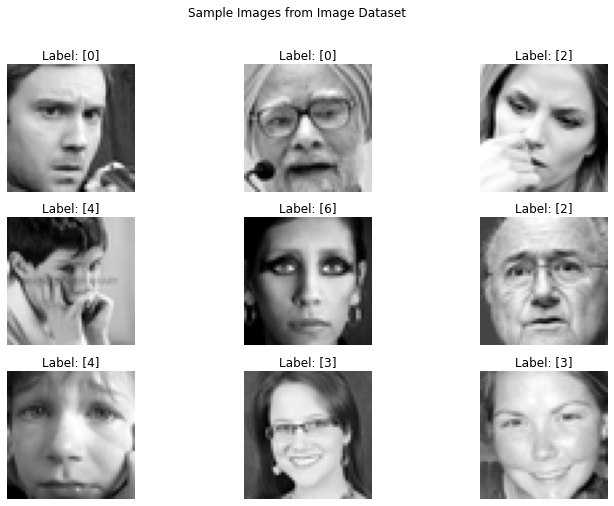

In [20]:
# Visualize a sample of images from the image dataset
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.suptitle('Sample Images from Image Dataset')
plt.show()

In [21]:
# Preprocess images
target_size = (48, 48)

def preprocess_image(image):
    image_array = np.array(image)
    resized_image = np.array(Image.fromarray(image_array).resize(target_size))
    normalized_image = resized_image / 255.0
    if len(normalized_image.shape) == 2:  # If the image is grayscale
        normalized_image = np.expand_dims(normalized_image, axis=-1)  # Add channel dimension
    return normalized_image

In [22]:
# Generator function to preprocess images and labels in batches
def image_data_generator(images, labels, batch_size):
    num_samples = len(images)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = images[offset:offset + batch_size]
            batch_labels = labels[offset:offset + batch_size]

            preprocessed_batch_images = [preprocess_image(image) for image in batch_images]
            preprocessed_batch_labels = to_categorical(batch_labels, num_classes=7)  # Assuming 7 classes

            yield np.array(preprocessed_batch_images), np.array(preprocessed_batch_labels)


In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential

# Define the batch size
batch_size = 16

# Define the CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 emotion classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Calculate the number of steps per epoch
steps_per_epoch = len(images) // batch_size

In [25]:
# Fit the image model using the generator
model.fit(
    image_data_generator(images, labels, batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=40,
    validation_data=image_data_generator(images, labels, batch_size),
    validation_steps=steps_per_epoch // 10
) 


Epoch 1/40
1794/1794 [==============================] - 43s 23ms/step - loss: 1.7229 - accuracy: 0.3048 - val_loss: 1.5558 - val_accuracy: 0.4019
Epoch 2/40
1794/1794 [==============================] - 42s 23ms/step - loss: 1.5186 - accuracy: 0.4129 - val_loss: 1.4199 - val_accuracy: 0.4679
Epoch 3/40
1794/1794 [==============================] - 42s 23ms/step - loss: 1.4345 - accuracy: 0.4511 - val_loss: 1.3419 - val_accuracy: 0.4881
Epoch 4/40
1794/1794 [==============================] - 42s 23ms/step - loss: 1.3818 - accuracy: 0.4727 - val_loss: 1.3245 - val_accuracy: 0.4965
Epoch 5/40
1794/1794 [==============================] - 39s 21ms/step - loss: 1.3373 - accuracy: 0.4858 - val_loss: 1.2765 - val_accuracy: 0.5017
Epoch 6/40
1794/1794 [==============================] - 44s 25ms/step - loss: 1.3003 - accuracy: 0.5030 - val_loss: 1.2389 - val_accuracy: 0.5122
Epoch 7/40
1794/1794 [==============================] - 37s 21ms/step - loss: 1.2798 - accuracy: 0.5116 - val_loss: 1.1996 -

In [26]:
# Generate predictions for the validation set using the image model
y_image_pred =model.predict(image_data_generator(images, labels, batch_size), steps=len(images) // batch_size)
y_image_pred_labels = np.argmax(y_image_pred, axis=1)

In [27]:
# Align lengths of predictions
min_length = min(len(y_text_pred), len(y_image_pred_labels))
y_text_pred = y_text_pred[:min_length]
y_image_pred_labels = y_image_pred_labels[:min_length]

In [28]:
# Calculate Pearson and Spearman correlation coefficients
pearson_corr, _ = pearsonr(y_text_pred, y_image_pred_labels)
spearman_corr, _ = spearmanr(y_text_pred, y_image_pred_labels)


In [29]:
print(f'Pearson Correlation: {pearson_corr}')
print(f'Spearman Correlation: {spearman_corr}')

Pearson Correlation: 0.002882385628494792
Spearman Correlation: 0.0022931573574106515


In [30]:
# Visualize the correlation between text and image emotions
correlation_df = pd.DataFrame({
    'text_emotion': y_text_pred,
    'image_emotion': y_image_pred_labels
})

correlation_matrix = correlation_df.corr()


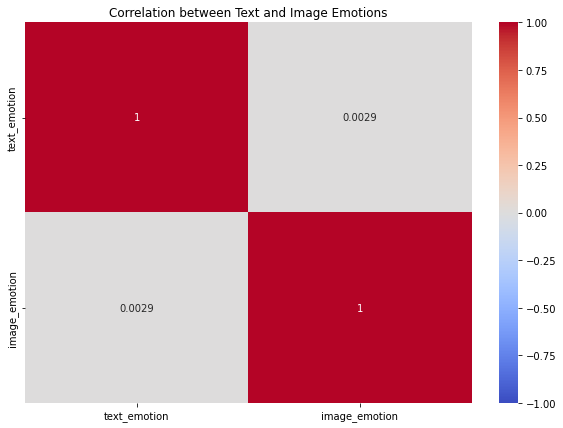

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Text and Image Emotions')
plt.show()

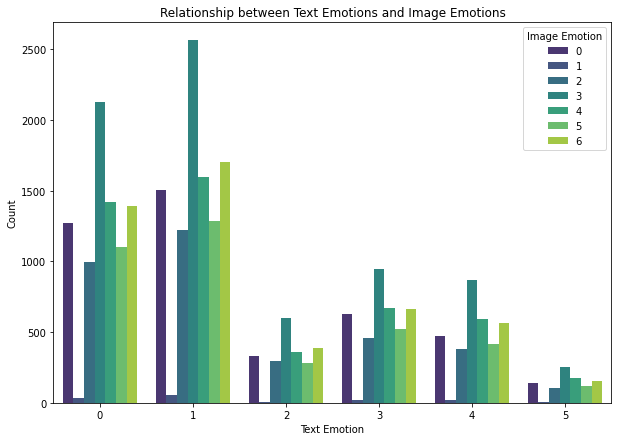

In [32]:
#Visualization for Relationship between different emotions
plt.figure(figsize=(10, 7))
sns.countplot(x='text_emotion', hue='image_emotion', data=correlation_df, palette='viridis')
plt.title('Relationship between Text Emotions and Image Emotions')
plt.xlabel('Text Emotion')
plt.ylabel('Count')
plt.legend(title='Image Emotion')
plt.show()


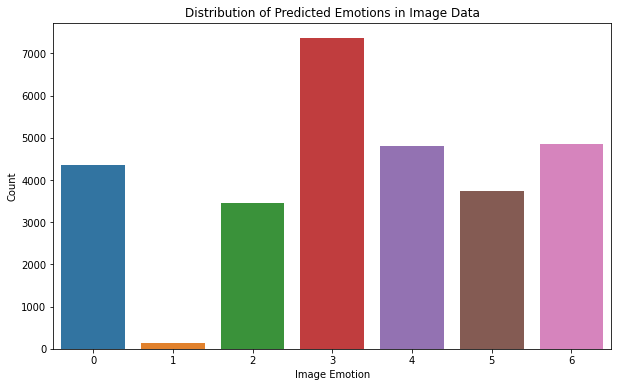

In [33]:
# Visualize the distribution of predicted emotions in image data
plt.figure(figsize=(10, 6))
sns.countplot(x='image_emotion', data=correlation_df)
plt.title('Distribution of Predicted Emotions in Image Data')
plt.xlabel('Image Emotion')
plt.ylabel('Count')
plt.show()